# For two continuous variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# Make the scatterplot matrix
# Set the default plot aesthetics to be prettier
sns.set_style('white')

df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')

# Take the subset of the data to make plots clearer
df_czch = df.loc[
    (df['cntry'] == 'CZ') | (df['cntry'] == 'CH') & (df['year'] == 6), 
    ['cntry', 'tvtot', 'ppltrst', 'pplfair', 'pplhlp', 'happy', 'sclmeet']
]

In [3]:
# Check dataset.
df_czch.head()

,cntry,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet
0,CH,3.0,3.0,10.0,5.0,8.0,5.0
1,CH,6.0,5.0,7.0,5.0,9.0,3.0
2,CH,1.0,8.0,8.0,8.0,7.0,6.0
3,CH,4.0,6.0,6.0,7.0,10.0,6.0
4,CH,5.0,6.0,7.0,5.0,8.0,7.0


In [4]:
# Because the variables can only take integer values between 0 and 10, points
# on the scatterplot will hide one another. To better see all the points, we
# create a dataframe of random noise (or "jitter") and add it only when plotting.

# Make a copy of the data to add jitter to and plot.
df_jittered = df_czch.loc[:, 'tvtot':'sclmeet'].dropna()

In [5]:
df_jittered.head()

,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet
0,3.0,3.0,10.0,5.0,8.0,5.0
1,6.0,5.0,7.0,5.0,9.0,3.0
2,1.0,8.0,8.0,8.0,7.0,6.0
3,4.0,6.0,6.0,7.0,10.0,6.0
4,5.0,6.0,7.0,5.0,8.0,7.0


In [6]:
# Making the random noise.
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(df_jittered.shape)),
    columns=df_jittered.columns
)

In [7]:
# Combine the data and the noise.
df_jittered = df_jittered.add(jitter)

In [14]:
jitter.head()

,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet
0,0.205023,0.042229,-0.036860,-0.145100,-0.139914,-0.162139
1,-0.199165,-0.226459,0.162044,-0.176857,-0.093260,0.250095
2,-0.061697,-0.163788,0.204882,-0.036930,0.000996,-0.292148
3,0.105722,0.170846,0.145604,-0.285656,0.071901,-0.039109
4,-0.159977,0.052433,-0.298868,0.080962,-0.225401,-0.157565


In [20]:
df_jittered.head()

,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet
0,3.205023,3.042229,9.963140,4.854900,7.860086,4.837861
1,5.800835,4.773541,7.162044,4.823143,8.906740,3.250095
2,0.938303,7.836212,8.204882,7.963070,7.000996,5.707852
3,4.105722,6.170846,6.145604,6.714344,10.071901,5.960891
4,4.840023,6.052433,6.701132,5.080962,7.774599,6.842435


In [41]:
# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_jittered, diag_sharey=False)

## Make Scatterplot Matrix

C:\Users\Andrew Kim\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\Andrew Kim\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


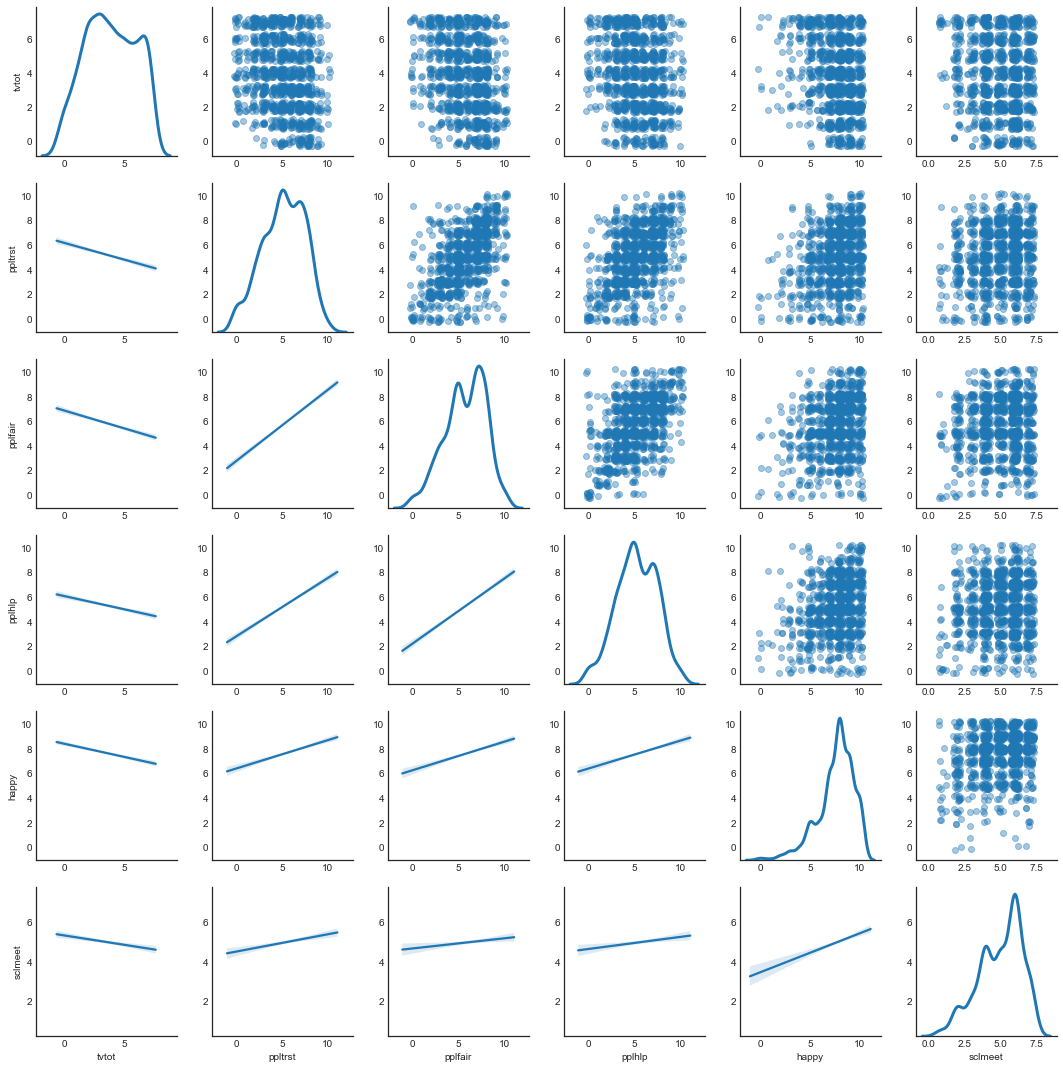

In [42]:
# Scatterplot.
g.map_upper(plt.scatter, alpha=.4)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

#Some warnings will show up below because the plot does not include a legend.

## Make Correlation Matrix

            tvtot   ppltrst   pplfair    pplhlp     happy   sclmeet
tvtot    1.000000 -0.211080 -0.205954 -0.151126 -0.204787 -0.115621
ppltrst -0.211080  1.000000  0.625162  0.541456  0.272610  0.126717
pplfair -0.205954  0.625162  1.000000  0.565463  0.283044  0.086561
pplhlp  -0.151126  0.541456  0.565463  1.000000  0.248136  0.080914
happy   -0.204787  0.272610  0.283044  0.248136  1.000000  0.244360
sclmeet -0.115621  0.126717  0.086561  0.080914  0.244360  1.000000


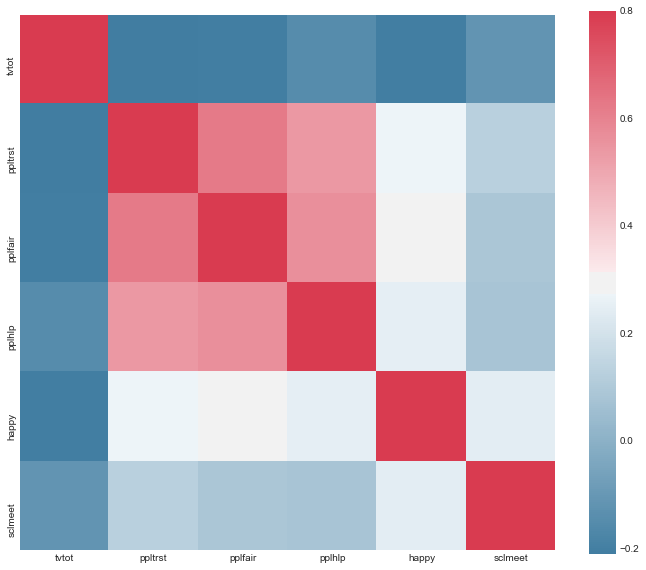

In [53]:
# Make the correlation matrix.
corrmat = df_czch.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, cmap=sns.diverging_palette(235, 8, as_cmap=True), square=True)
plt.show()
# Heatmaps are a great way to get a quick visual read on a big correlation matrix.

# Try to match the correlation numbers to the scatterplots above to get a 
# sense of what each magnitude of correlation can look like.

In [46]:
corrmat

,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet
tvtot,1.000000,-0.211080,-0.205954,-0.151126,-0.204787,-0.115621
ppltrst,-0.211080,1.000000,0.625162,0.541456,0.272610,0.126717
pplfair,-0.205954,0.625162,1.000000,0.565463,0.283044,0.086561
pplhlp,-0.151126,0.541456,0.565463,1.000000,0.248136,0.080914
happy,-0.204787,0.272610,0.283044,0.248136,1.000000,0.244360
sclmeet,-0.115621,0.126717,0.086561,0.080914,0.244360,1.000000


# For one continuous and one categorical

In [55]:
df_long.head()

,cntry,variable,value
0,CH,tvtot,3.0
1,CH,tvtot,6.0
2,CH,tvtot,1.0
3,CH,tvtot,4.0
4,CH,tvtot,5.0


In [69]:
df_czch.groupby('cntry').describe()

happy                                              pplfair            \
        count      mean      std  min  25%  50%  75%   max   count      mean   
cntry                                                                          
CH      770.0  8.088312  1.43792  0.0  7.0  8.0  9.0  10.0   770.0  6.350649   
CZ     1298.0  6.842835  1.97984  0.0  5.0  7.0  8.0  10.0  1307.0  4.931905   

                                           pplhlp                           \
            std  min  25%  50%  75%   max   count      mean       std  min   
cntry                                                                        
CH     1.964352  0.0  5.0  7.0  8.0  10.0   771.0  5.726329  2.004947  0.0   
CZ     2.193011  0.0  3.0  5.0  7.0  10.0  1311.0  4.484363  2.228790  0.0   

                           ppltrst                                          \
       25%  50%  75%   max   count      mean       std  min  25%  50%  75%   
cntry                                                                        
CH     4.0  6.0  7.0  10.0   773.0  5.677878  2.130701  0.0  4.0  6.0  7.0   
CZ     3.0  5.0  6.0  10.0  1308.0  4.393731  2.357204  0.0  3.0  4.0  6.0   

            sclmeet                                                tvtot  \
        max   count      mean       std  min  25%  50%  75%  max   count   
cntry                                                                      
CH     10.0   770.0  5.080519  1.339122  1.0  4.0  5.0  6.0  7.0   772.0   
CZ     10.0  1310.0  4.547328  1.580188  1.0  4.0  5.0  6.0  7.0  1311.0   

                                                    
           mean       std  min  25%  50%  75%  max  
cntry                                               
CH     3.141192  1.913706  0.0  2.0  3.0  5.0  7.0  
CZ     4.913806  1.960538  0.0  4.0  5.0  7.0  7.0

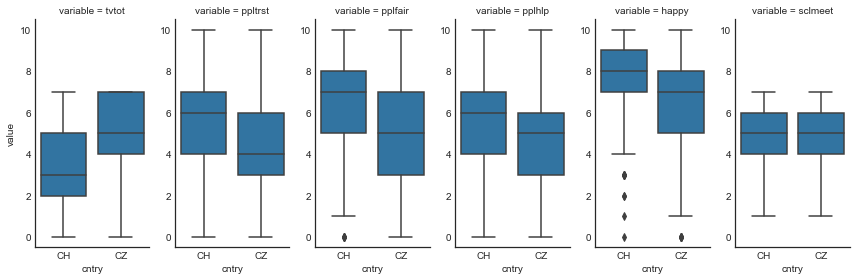

        happy                                              pplfair            \
        count      mean      std  min  25%  50%  75%   max   count      mean   
cntry                                                                          
CH      770.0  8.088312  1.43792  0.0  7.0  8.0  9.0  10.0   770.0  6.350649   
CZ     1298.0  6.842835  1.97984  0.0  5.0  7.0  8.0  10.0  1307.0  4.931905   

                                           pplhlp                           \
            std  min  25%  50%  75%   max   count      mean       std  min   
cntry                                                                        
CH     1.964352  0.0  5.0  7.0  8.0  10.0   771.0  5.726329  2.004947  0.0   
CZ     2.193011  0.0  3.0  5.0  7.0  10.0  1311.0  4.484363  2.228790  0.0   

                           ppltrst                                          \
       25%  50%  75%   max   count      mean       std  min  25%  50%  75%   
cntry                                               

In [63]:
pd.options.display.max_columns = None

# Plot all the variables with boxplots for each country.

# Restructure the data so we can use FacetGrid rather than making a boxplot
# for each variable separately.
df_long = df_czch
df_long = pd.melt(df_long, id_vars=['cntry'])

g = sns.FacetGrid(df_long, col="variable", size=4, aspect=.5)
g = g.map(sns.boxplot, "cntry", "value")
plt.show()

# Descriptive statistics by group.
print(df_czch.groupby('cntry').describe())

# Test whether group differences are significant.
for col in df_czch.loc[:,'tvtot':'sclmeet'].columns:
    print(col)
    print(stats.ttest_ind(
        df_czch[df_czch['cntry'] == 'CZ'][col].dropna(),
        df_czch[df_czch['cntry'] == 'CH'][col].dropna()
    ))

In [75]:
for col in df_czch.loc[:,'tvtot':'sclmeet'].columns:
    print(col)
    print(stats.ttest_ind(
        df_czch[df_czch['cntry'] == 'CZ'][col].dropna(),
        df_czch[df_czch['cntry'] == 'CH'][col].dropna()
    ))

tvtot
Ttest_indResult(statistic=20.106461723581617, pvalue=2.5820475055479487e-82)
ppltrst
Ttest_indResult(statistic=-12.438040624859211, pvalue=2.6145429114422107e-34)
pplfair
Ttest_indResult(statistic=-14.792717055935801, pvalue=3.7734646164281073e-47)
pplhlp
Ttest_indResult(statistic=-12.73600826627724, pvalue=7.8321696737189449e-36)
happy
Ttest_indResult(statistic=-15.234115043893649, pvalue=9.5521676986463663e-50)
sclmeet
Ttest_indResult(statistic=-7.8513074900638387, pvalue=6.5403984380301337e-15)


# For two categorical variables

In [81]:
df_2cat.head()

,cntry,partner,partner_cat
0,CH,1.0,Lives with partner
1,CH,1.0,Lives with partner
2,CH,2.0,Does not live with partner
3,CH,1.0,Lives with partner
4,CH,1.0,Lives with partner


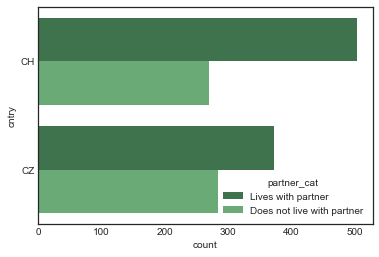

partner_cat  Does not live with partner  Lives with partner
cntry                                                      
CH                                  270                 503
CZ                                  284                 372
Power_divergenceResult(statistic=96.399580125962217, pvalue=9.2365935866454386e-21)


In [80]:
# Add a second categorical variable.
df_2cat = df.loc[
    ((df['cntry'] == 'CZ') | (df['cntry'] == 'CH')) & (df['year'] == 6),
    ['cntry','partner']
]

# Create a text variable so that output is easier to interpret.
df_2cat['partner_cat'] = None
df_2cat.loc[df_2cat['partner'] == 1, 'partner_cat'] = 'Lives with partner'
df_2cat.loc[df_2cat['partner'] == 2, 'partner_cat'] = 'Does not live with partner'

# Plot counts for each combination of levels.
sns.countplot(y="cntry", hue="partner_cat", data=df_2cat, palette="Greens_d")
plt.show()

# Table of counts
counttable = pd.crosstab(df_2cat['cntry'], df_2cat['partner_cat'])
print(counttable)

# Test will return a chi-square test statistic and a p-value. Like the t-test,
# the chi-square is compared against a distribution (the chi-square
# distribution) to determine whether the group size differences are large
# enough to reflect differences in the population.
print(stats.chisquare(counttable, axis=None))

In [83]:
counttable.head()

partner_cat,Does not live with partner,Lives with partner
cntry,,
CH,270,503
CZ,284,372


In [86]:
stats.chisquare(counttable, axis=None)

Power_divergenceResult(statistic=96.399580125962217, pvalue=9.2365935866454386e-21)